<a href="https://colab.research.google.com/github/vishva2410/Handwritten_ML_model/blob/main/Handwritten_no_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,recall_score

dig = load_digits()
x, y = dig.data, dig.target

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)


In [9]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = ohe.transform(y_test.reshape(-1,1)).toarray()

In [19]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
a = accuracy_score(y_test,y_pred)
c = classification_report(y_test,y_pred)
print('accuracy ------->',a*100,'%')
print(c)

accuracy -------> 97.22222222222221 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      0.93      0.96        56
           4       1.00      1.00      1.00        31
           5       1.00      0.94      0.97        36
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        34
           8       0.96      0.89      0.92        27
           9       0.95      1.00      0.97        36

   micro avg       0.99      0.97      0.98       360
   macro avg       0.99      0.97      0.98       360
weighted avg       0.99      0.97      0.98       360
 samples avg       0.97      0.97      0.97       360



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=30)
x_pca = pca.fit_transform(x_train)

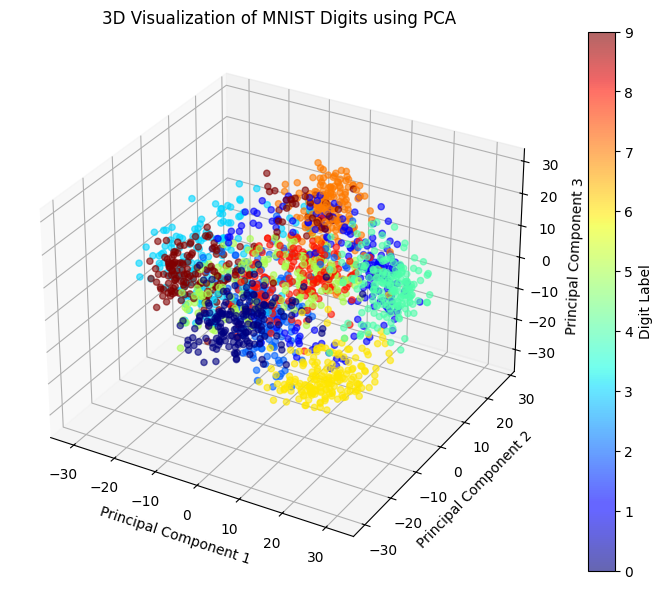

In [39]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='jet', alpha=0.6)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of MNIST Digits using PCA')

plt.colorbar(scatter, ax=ax, label='Digit Label')
plt.show()

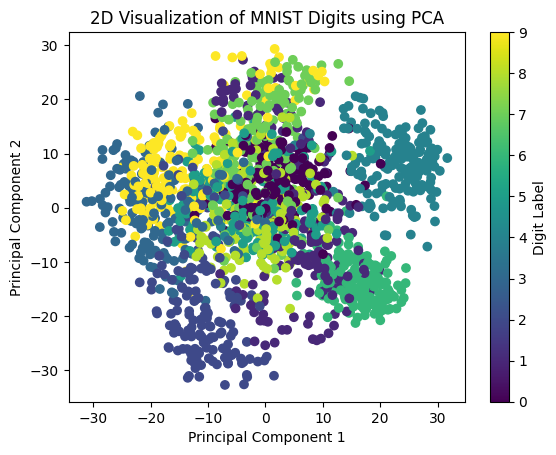

In [37]:
plt.scatter(X_pca[:,0],X_pca[:,-1],c=y,cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of MNIST Digits using PCA')
plt.colorbar(label='Digit Label')
plt.show()

In [38]:
from PIL import Image
import cv2

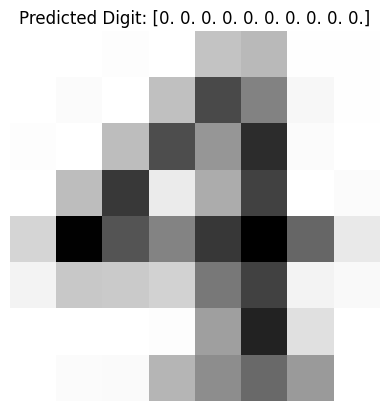

Predicted Digit: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
image_path = "images.jpeg"  #enter you image name here to get a prediction
img = Image.open(image_path).convert('L')
img = img.resize((8, 8), Image.LANCZOS)
img_array = np.array(img)

img_array = 16 * (img_array / 255.0)
img_flatten = img_array.flatten().reshape(1, -1)

if img_flatten.shape[1] == 64:
    img_flatten = scalar.transform(img_flatten)
    knn = model
    prediction = knn.predict(img_flatten)[0]

    plt.imshow(img_array, cmap='gray')
    plt.title(f"Predicted Digit: {prediction}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Digit: {prediction}")
else:
    print(f"Error: Expected 64 features, but got {img_flatten.shape[1]}. Check image preprocessing.")